In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import struct
import warnings

warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [69]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [70]:
directory = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
classes = [i for i in os.listdir(directory) if '.' not  in i]
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [71]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png': 
            if dir_name.split()[-1] != 'GT':          
                label.append(os.path.split(dir_name)[-1]) 
                path.append(os.path.join(dir_name, filename))

data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

In [72]:
data.label.value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

In [73]:
data = pd.DataFrame({'path': path, 'label': label})
data.head(5)

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel


In [74]:
label_to_int = {label: idx for idx, label in enumerate(data['label'].unique())}
data['label'] = data['label'].map(label_to_int)
data

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,0
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,0
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,0
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,0
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,0
...,...,...
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,8
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,8
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,8
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,8


In [75]:
def load_images(image_paths, target_size=(64, 64)):
    images = [img_to_array(load_img(img, target_size=target_size)) / 255.0 for img in image_paths]
    return np.array(images)

In [76]:
X = load_images(data['path'].values)
y = tf.keras.utils.to_categorical(data['label'].values, num_classes=len(label_to_int))

print(f"Loaded {X.shape[0]} images with shape {X.shape[1:]}.")

Loaded 9000 images with shape (64, 64, 3).


In [77]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 6300, Validation samples: 1350, Test samples: 1350


In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(label_to_int), activation='softmax')
])

In [79]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
results = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.2722 - loss: 1.8976 - val_accuracy: 0.6733 - val_loss: 0.9059
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6945 - loss: 0.8612 - val_accuracy: 0.8644 - val_loss: 0.4338
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8506 - loss: 0.4411 - val_accuracy: 0.8904 - val_loss: 0.2979
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9146 - loss: 0.2578 - val_accuracy: 0.9148 - val_loss: 0.2444
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9327 - loss: 0.1780 - val_accuracy: 0.9400 - val_loss: 0.1669
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9622 - loss: 0.1119 - val_accuracy: 0.9467 - val_loss: 0.1500
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9660 - loss: 0.0984 - val_accuracy: 0.9704 - val_loss: 0.0901
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9715 - loss: 0.0811 - val_accuracy: 

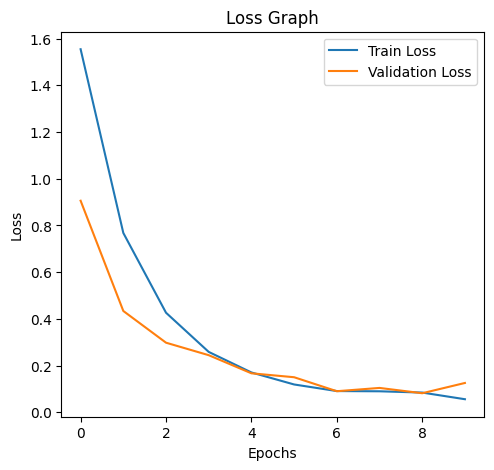

In [81]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

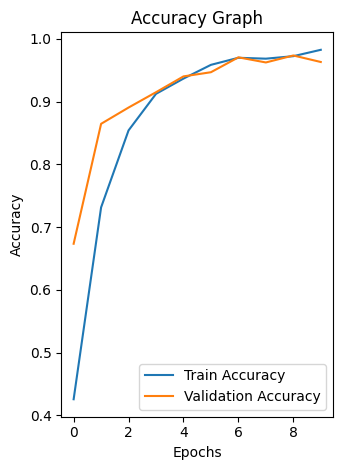

In [82]:
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [83]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.1407, Test Accuracy: 0.9600


In [84]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


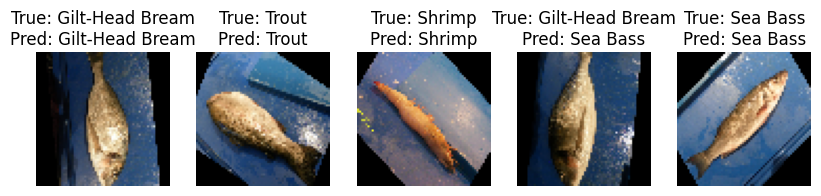

In [85]:
def plot_predictions(images, true_labels, pred_labels, class_names, num_images=50):
    plt.figure(figsize=(10, 100))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}')
        plt.axis('off')
    plt.show()

plot_predictions(X_test, y_true, y_pred_classes, list(label_to_int.keys()), num_images=5)